In [1]:
## importing all the required libraries to perform the classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
## assigning the dataset into the yelp variable
yelp = pd.read_csv('yelpsentiment.csv')

In [3]:
## shape of the yelp dataset
yelp.shape

(10000, 11)

In [4]:
## the top 5 information contained in the yelp dataset
yelp.head()

business_id       date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw   1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  excellent  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  excellent  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0       good  
3  uZetl9T0NcROGOyFfughhg     1       2      0  excellent  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0  excellent

In [5]:
## information of yelp variable
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
sentiment      10000 non-null object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB


In [6]:
## getting the count,mean,std,min,25%,50%,75% and max value in the yelp variable
yelp.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

In [7]:
## To get an insight on the length of each review, we can create a new column called text length
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

business_id       date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw   1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment  text length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  excellent          889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  excellent         1345  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0       good           76  
3  uZetl9T0NcROGOyFfughhg     1       2      0  excellent          419  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0  excellent          469

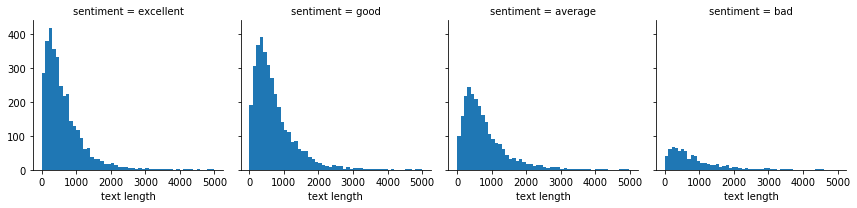

In [8]:
## FacetGrid to see if there’s any relationship between newly created text length feature and the sentiments pf the reviews.
g = sns.FacetGrid(data=yelp, col='sentiment')
g.map(plt.hist, 'text length', bins=50)

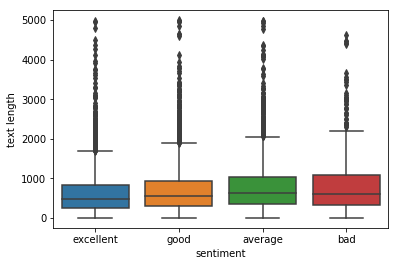

In [9]:
## creating a box plot of the text length for each sentiments
sns.boxplot(x='sentiment', y='text length', data=yelp)

In [10]:
## grouping the data by the sentiments and see if we can find a correlation between features such as cool, useful, and funny.
sentiment = yelp.groupby('sentiment').mean()
sentiment.corr()

stars      cool    useful     funny  text length
stars        1.000000  0.965520 -0.874867 -0.964252    -0.962723
cool         0.965520  1.000000 -0.901449 -0.966219    -0.875804
useful      -0.874867 -0.901449  1.000000  0.971637     0.721637
funny       -0.964252 -0.966219  0.971637  1.000000     0.860550
text length -0.962723 -0.875804  0.721637  0.860550     1.000000

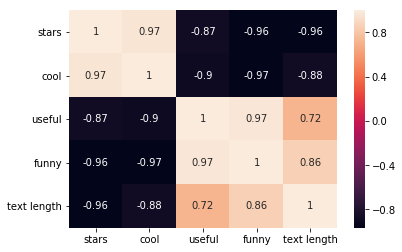

In [11]:
## visualizing these correlations
sns.heatmap(data=sentiment.corr(), annot=True)

In [12]:
## grabbing the required sentiments and storing in the variable yelp_class
yelp_class = yelp[(yelp['sentiment'] == 'bad') | (yelp['sentiment'] == 'good') | (yelp['sentiment'] == 'average') | (yelp['sentiment'] == 'excellent')]
yelp_class.shape

(10000, 12)

In [15]:
## retrieving the text and sentiments and storing X and y respectively
X = yelp_class['text']
y = yelp_class['sentiment']

In [24]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [15]:
## Function to remove punctuations and stop words from each of the review
import string
def text_process(text):
        nopunc = [char for char in text if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
## importing count vectorizer to convert the list of tokens obtained from the above text_process function
## an instance is fitted to convert all the text reviews into vector format
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [17]:
## size of the vocabulary stored in the vectorizer 
len(bow_transformer.vocabulary_)

44011

In [ ]:
## retrieving the 25th review
review_25 = X[24]

In [19]:
## transforming the review into vector format
bow_25 = bow_transformer.transform([review_25])

In [20]:
## getting the vector format and their term frequency 
print (bow_25)

  (0, 3639)	1
  (0, 5228)	1
  (0, 15188)	1
  (0, 15553)	1
  (0, 15801)	1
  (0, 16305)	1
  (0, 16470)	1
  (0, 18351)	1
  (0, 19299)	3
  (0, 19385)	1
  (0, 20015)	1
  (0, 20542)	1
  (0, 22302)	1
  (0, 22641)	1
  (0, 24187)	1
  (0, 25318)	1
  (0, 27290)	1
  (0, 29629)	1
  (0, 29849)	1
  (0, 33440)	1
  (0, 33860)	1
  (0, 36757)	3
  (0, 41230)	1
  (0, 43443)	1


In [21]:
## retrieving the 26th review
review_26 = X[25]

In [22]:
## transforming the review into vector format
bow_26 = bow_transformer.transform([review_25])

In [23]:
##printing the feature names of the following vectors
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

Replaced
dimwitted


In [24]:
## transforming our X dataframe into a sparse matrix
X = bow_transformer.transform(X)

In [25]:
## shape of new X
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (10000, 44011)
Amount of Non-Zero occurrences:  583223
Density: 0.1325175524300743


In [26]:
## importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
## importing Multinomial Naive Bayes and fitting the classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
## predicting the label against the test data 
preds = nb.predict(X_test)

In [29]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[251   5  41 184]
 [100  21  11  13]
 [ 27   2 362 270]
 [ 67   2 140 504]]


             precision    recall  f1-score   support

    average       0.56      0.52      0.54       481
        bad       0.70      0.14      0.24       145
  excellent       0.65      0.55      0.60       661
       good       0.52      0.71      0.60       713

avg / total       0.59      0.57      0.56      2000



In [30]:
## a review is taken to predict whether the above multinomial NB is predicting the sentiment of the review correct
review = yelp_class['text'][59]
review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [31]:
## the review is pre-processed by feature extraction and vectorisation 
review_transformed = bow_transformer.transform([review])

In [32]:
## Sentiment of the sample review
nb.predict(review_transformed)[0]

'excellent'

In [34]:
## a review is taken to predict whether the above multinomial NB is predicting the sentiment of the review correct
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [35]:
## the review is pre-processed by feature extraction and vectorisation and the sentiment of the review
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]


'bad'

In [36]:
## importing Gaussian Naive Bayes and fitting the classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
X_train=X_train.toarray()

In [37]:
## fitting the classifier
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [38]:
## predicting the label against the test data 
X_test=X_test.toarray()
predictions = nb.predict(X_test)

In [39]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[180  50 100 151]
 [ 64  31  27  23]
 [195  66 232 168]
 [250  53 219 191]]


             precision    recall  f1-score   support

    average       0.26      0.37      0.31       481
        bad       0.15      0.21      0.18       145
  excellent       0.40      0.35      0.37       661
       good       0.36      0.27      0.31       713

avg / total       0.33      0.32      0.32      2000



In [40]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.317

In [41]:
## importing KNN and fitting the classifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
## building a classifier using KNN 
classifier = KNeighborsClassifier(algorithm='brute')

In [43]:
##fitting the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [45]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3735

In [46]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[134  56 180 111]
 [ 39  31  57  18]
 [ 84  61 413 103]
 [125  56 363 169]]


             precision    recall  f1-score   support

    average       0.35      0.28      0.31       481
        bad       0.15      0.21      0.18       145
  excellent       0.41      0.62      0.49       661
       good       0.42      0.24      0.30       713

avg / total       0.38      0.37      0.36      2000



In [47]:
## building a classifier using KNN with K=8
classifier = KNeighborsClassifier(algorithm='brute',n_neighbors=8,metric='euclidean')

In [48]:
##fitting the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [49]:
## predicting the label against the test data
predictions = classifier.predict(X_test)

In [50]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.387

In [51]:
## building a classifier using KNN with K=3
classifier = KNeighborsClassifier(algorithm='brute',n_neighbors=3,metric='euclidean')

In [52]:
##fitting the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [53]:
## predicting the label against the test data
predictions = classifier.predict(X_test)

In [54]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.358

In [27]:
## building a deciscion tree classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
classifier=DecisionTreeClassifier(random_state=0)

In [29]:
##fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [58]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [59]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.4095

In [60]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[173  43 116 149]
 [ 44  34  37  30]
 [ 76  27 324 234]
 [162  23 240 288]]


             precision    recall  f1-score   support

    average       0.38      0.36      0.37       481
        bad       0.27      0.23      0.25       145
  excellent       0.45      0.49      0.47       661
       good       0.41      0.40      0.41       713

avg / total       0.41      0.41      0.41      2000



In [61]:
## importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
## building a Random Forest Classifier
classifier = RandomForestClassifier()

In [63]:
##fitting the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [65]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.4415

In [66]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[205   9 103 164]
 [ 77  14  23  31]
 [ 85   3 374 199]
 [145   5 273 290]]


             precision    recall  f1-score   support

    average       0.40      0.43      0.41       481
        bad       0.45      0.10      0.16       145
  excellent       0.48      0.57      0.52       661
       good       0.42      0.41      0.42       713

avg / total       0.44      0.44      0.43      2000



In [67]:
## import Linear SVC
from sklearn.svm import LinearSVC

In [68]:
## building a Linear SVC Classifier
classifier = LinearSVC()

In [69]:
## fitting the classifier
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [70]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [71]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.51

In [72]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[235  44  67 135]
 [ 50  58  21  16]
 [ 44  15 386 216]
 [130  12 230 341]]


             precision    recall  f1-score   support

    average       0.51      0.49      0.50       481
        bad       0.45      0.40      0.42       145
  excellent       0.55      0.58      0.57       661
       good       0.48      0.48      0.48       713

avg / total       0.51      0.51      0.51      2000



In [73]:
## importing the extra trees classifier
from sklearn.tree import ExtraTreeClassifier

In [74]:
## Building the classifier
classifier = ExtraTreeClassifier()

In [75]:
## fitting the extra trees classifier 
classifier.fit(X_train, y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [76]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [77]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.373

In [78]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[161  45 106 169]
 [ 51  27  36  31]
 [109  32 284 236]
 [173  39 227 274]]


             precision    recall  f1-score   support

    average       0.33      0.33      0.33       481
        bad       0.19      0.19      0.19       145
  excellent       0.43      0.43      0.43       661
       good       0.39      0.38      0.39       713

avg / total       0.37      0.37      0.37      2000



In [79]:
## importing the Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

In [80]:
## Building the classifier
classifier = BernoulliNB()

In [81]:
## fitting the Bernoulli NB classifier
classifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [82]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [83]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.459

In [84]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[148   7 159 167]
 [ 55  10  65  15]
 [ 34   8 445 174]
 [ 73   6 319 315]]


             precision    recall  f1-score   support

    average       0.48      0.31      0.37       481
        bad       0.32      0.07      0.11       145
  excellent       0.45      0.67      0.54       661
       good       0.47      0.44      0.46       713

avg / total       0.45      0.46      0.44      2000



In [85]:
## importing the extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [86]:
## Building the classifier
classifier = ExtraTreesClassifier()

In [87]:
## fitting theBernoulli NB classifier
classifier.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [89]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.45

In [90]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[211  13  96 161]
 [ 83  14  26  22]
 [ 77   3 372 209]
 [138   8 264 303]]


             precision    recall  f1-score   support

    average       0.41      0.44      0.43       481
        bad       0.37      0.10      0.15       145
  excellent       0.49      0.56      0.52       661
       good       0.44      0.42      0.43       713

avg / total       0.44      0.45      0.44      2000



In [91]:
## importing the logistic regression classifier
from sklearn.linear_model import LogisticRegression

In [92]:
## building the classifier
classifier = LogisticRegression()

In [93]:
## fitting the classifier
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [95]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5465

In [96]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[270  36  55 120]
 [ 58  52  15  20]
 [ 37   6 409 209]
 [108   4 239 362]]


             precision    recall  f1-score   support

    average       0.57      0.56      0.57       481
        bad       0.53      0.36      0.43       145
  excellent       0.57      0.62      0.59       661
       good       0.51      0.51      0.51       713

avg / total       0.55      0.55      0.54      2000



In [97]:
## fitting the MLP classifier and predicting the label and determining the accuracy
from sklearn.neural_network import MLPClassifier

In [98]:
## buidling the classifier
classifier = MLPClassifier()

In [99]:
## fiiting the classifier
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [100]:
predictions = classifier.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5225

In [102]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))


[[244  36  66 135]
 [ 58  55  14  18]
 [ 41   9 393 218]
 [134   4 222 353]]


             precision    recall  f1-score   support

    average       0.51      0.51      0.51       481
        bad       0.53      0.38      0.44       145
  excellent       0.57      0.59      0.58       661
       good       0.49      0.50      0.49       713

avg / total       0.52      0.52      0.52      2000



In [29]:
## importing the bagging classifier
from sklearn.ensemble import BaggingClassifier

In [30]:
## importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
## building an ensemble classifier with bagging classifier and KNN classifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [32]:
## fitting the classifier
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [33]:
## predicting the label against the test data 
predictions = bagging.predict(X_test)

In [34]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.388

In [35]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 45   1 278 157]
 [ 13   2  97  33]
 [ 14   1 517 129]
 [ 40   0 461 212]]


             precision    recall  f1-score   support

    average       0.40      0.09      0.15       481
        bad       0.50      0.01      0.03       145
  excellent       0.38      0.78      0.51       661
       good       0.40      0.30      0.34       713

avg / total       0.40      0.39      0.33      2000



In [36]:
## importing the adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [37]:
## building the adaboost classifier
classifier = AdaBoostClassifier(n_estimators=100)

In [38]:
## fitting the classifier
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [39]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [40]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[219  29  97 136]
 [ 51  47  34  13]
 [ 52   5 413 191]
 [ 99  14 301 299]]


             precision    recall  f1-score   support

    average       0.52      0.46      0.49       481
        bad       0.49      0.32      0.39       145
  excellent       0.49      0.62      0.55       661
       good       0.47      0.42      0.44       713

avg / total       0.49      0.49      0.48      2000



In [41]:
## importing the gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
## building the gradient boosting classifier
classfier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [43]:
## fitting the classifier
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [44]:
## predicting the label against the test data
predictions = classifier.predict(X_test)

In [45]:
## confusion matrix and classification report to get the precision ,recall and f1 support to get the accuracy
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

[[219  29  97 136]
 [ 51  47  34  13]
 [ 52   5 413 191]
 [ 99  14 301 299]]


             precision    recall  f1-score   support

    average       0.52      0.46      0.49       481
        bad       0.49      0.32      0.39       145
  excellent       0.49      0.62      0.55       661
       good       0.47      0.42      0.44       713

avg / total       0.49      0.49      0.48      2000



0.489

In [20]:
## top 5 labels from the dataset
y.head()



0    excellent
1    excellent
2         good
3    excellent
4    excellent
Name: sentiment, dtype: object

In [30]:
## visualizing the deciscion tree
from sklearn import tree
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(classifier, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)